# Ampliación Práctica 3: Resolución Numérica  de PVIs  usando Python

Autor de esta versión: **Juan Antonio Villegas**

Autor de la primera versión: Pedro González Rodelas

Fecha de la primera versión: 01/05/2020

Sucesivas revisiones: 02-08 y 11/05/2020, 02/06/2021

Fecha de la última revisión: 15/5/2025

En este notebook presentamos algunos ejemplos de resolución numérica de ecuaciones y sistemas de ecuaciones diferenciales de orden superior. En concreto, se presentan:
- Ecuaciones de Lorenz
- Muelles acoplados y amortiguados
- Doble péndulo.

Estos son ejemplos clásicos de modelos resueltos mediante sistemas de ecuaciones diferenciales. A continuación presentamos cada uno de ellos y maneras de resolverlos utilizando órdenes de `python`.

In [7]:
# Carga de librerías necesarias
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import matplotlib as mpl

from scipy import integrate

%matplotlib inline
mpl.rcParams['text.usetex'] = True

## Ecuaciones de Lorenz

$$
x'(t) = \sigma(y - x)
$$
$$
y'(t) = x(\rho - z) - y 
$$
$$
z'(t) = x y - \beta z
$$

In [8]:
def f(xyz, t, rho, sigma, beta):
    x, y, z = xyz
    return [sigma * (y - x),
            x * (rho - z) - y,
            x * y - beta * z]

In [9]:
rho = 28
sigma = 8
beta = 8/3.0

In [10]:
t = np.linspace(0, 25, 10000)

In [11]:
xyz0 = [1.0, 1.0, 1.0]

In [12]:
xyz1 = integrate.odeint(f, xyz0, t, args=(rho, sigma, beta))

In [13]:
xyz2 = integrate.odeint(f, xyz0, t, args=(rho, sigma, 0.6*beta))

In [14]:
xyz3 = integrate.odeint(f, xyz0, t, args=(rho, 2*sigma, 0.6*beta))

In [15]:
xyz3.shape

(10000, 3)

In [16]:
from mpl_toolkits.mplot3d.axes3d import Axes3D

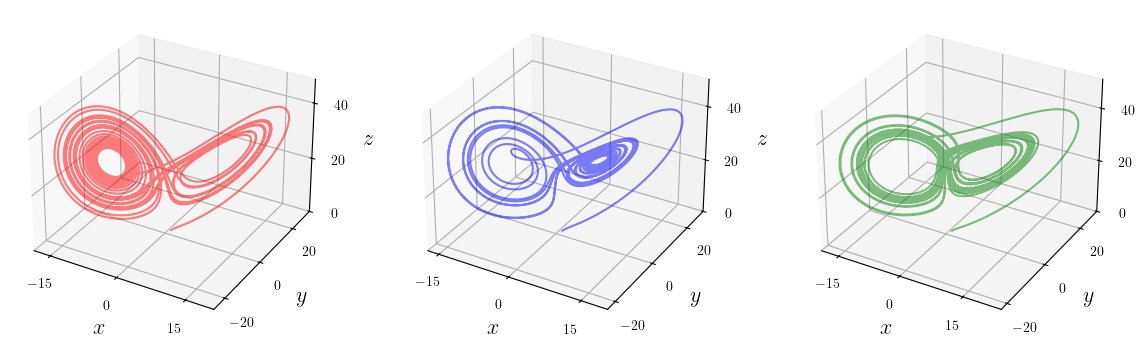

In [17]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 3.5), subplot_kw={'projection': '3d'})

for ax, xyz, c in [(ax1, xyz1, 'r'), (ax2, xyz2, 'b'), (ax3, xyz3, 'g')]:
    ax.plot(xyz[:,0], xyz[:,1], xyz[:,2], c, alpha=0.5)
    ax.set_xlabel('$x$', fontsize=16)
    ax.set_ylabel('$y$', fontsize=16)
    ax.set_zlabel('$z$', fontsize=16)
    ax.set_xticks([-15, 0, 15])
    ax.set_yticks([-20, 0, 20])
    ax.set_zticks([0, 20, 40])

fig.tight_layout()
fig.savefig('cap9-ecuaciones_Lorentz.pdf')

## Muelles acoplados y amortigüados

Como ecuaciones de segundo orden:

$$
m_1 x_1''(t) + \gamma_1 x_1'(t) + k_1 (x_1(t) - l_1) - k_2 (x_2(t) - x_1(t) - l_2) = 0\\
m_2 x_2''(t) + \gamma_2 x_2' + k_2 (x_2 - x_1 - l_2) = 0
$$

O de forma estándard:

\begin{align}
y_1'(t) &= y_2(t) \\
y_2'(t) &= -\gamma_1/m_1 y_2(t) - k_1/m_1 (y_1(t) - l_1) + k_2 (y_3(t) - y_1(t) - l_2)/m_1 \\
y_3'(t) &= y_4(t) \\
y_4'(t) &= - \gamma_2 y_4(t)/m_2 - k_2 (y_3(t) - y_1(t) - l_2)/m_2 \\
\end{align}

In [18]:
def f(t, y, args):
    m1, k1, g1, m2, k2, g2 = args
    
    return [y[1], 
            - k1/m1 * y[0] + k2/m1 * (y[2] - y[0]) - g1/m1 * y[1], 
            y[3], 
            - k2/m2 * (y[2] - y[0]) - g2/m2 * y[3] ]

In [19]:
m1, k1, g1 = 1.0, 10.0, 0.5

In [20]:
m2, k2, g2 = 2.0, 40.0, 0.25

In [21]:
args = (m1, k1, g1, m2, k2, g2)

In [22]:
y0 = [1.0, 0, 0.5, 0]

In [23]:
t = np.linspace(0, 20, 1000)

In [24]:
r = integrate.ode(f)

In [25]:
r.set_integrator('lsoda');

In [26]:
r.set_initial_value(y0, t[0]);

In [27]:
r.set_f_params(args);

In [28]:
dt = t[1] - t[0]
y = np.zeros((len(t), len(y0)))
idx = 0
while r.successful() and r.t < t[-1]:
    y[idx, :] = r.y
    r.integrate(r.t + dt)
    idx += 1

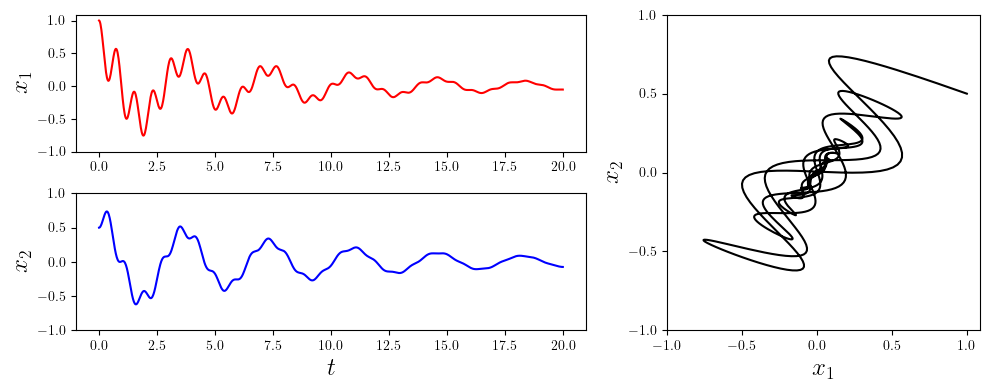

In [29]:
fig = plt.figure(figsize=(10, 4))
ax1 = plt.subplot2grid((2, 5), (0, 0), colspan=3)
ax2 = plt.subplot2grid((2, 5), (1, 0), colspan=3)
ax3 = plt.subplot2grid((2, 5), (0, 3), colspan=2, rowspan=2)

ax1.plot(t, y[:, 0], 'r')
ax1.set_ylabel('$x_1$', fontsize=18)
ax1.set_yticks([-1, -.5, 0, .5, 1])

ax2.plot(t, y[:, 2], 'b')
ax2.set_xlabel('$t$', fontsize=18)
ax2.set_ylabel('$x_2$', fontsize=18)
ax2.set_yticks([-1, -.5, 0, .5, 1])

ax3.plot(y[:, 0], y[:, 2], 'k')
ax3.set_xlabel('$x_1$', fontsize=18)
ax3.set_ylabel('$x_2$', fontsize=18)
ax3.set_xticks([-1, -.5, 0, .5, 1])
ax3.set_yticks([-1, -.5, 0, .5, 1])

fig.tight_layout()
# fig.savefig('cap9-muelles-acoplados.pdf')

#### Realicemos ahora el mismo cálculo anterior, pero especificando también el Jacobiano:

In [30]:
def jac(t, y, args):
    m1, k1, g1, m2, k2, g2 = args
    
    return [[0, 1, 0, 0], 
            [- k1/m1 - k2/m1, - g1/m1 * y[1], k2/m1, 0],
            [0, 0, 1, 0],
            [k2/m2, 0, - k2/m2, - g2/m2]]

In [31]:
r = integrate.ode(f, jac).set_f_params(args).set_jac_params(args).set_initial_value(y0, t[0])

In [32]:
dt = t[1] - t[0]
y = np.zeros((len(t), len(y0)))
idx = 0
while r.successful() and r.t < t[-1]:
    y[idx, :] = r.y
    r.integrate(r.t + dt)
    idx += 1

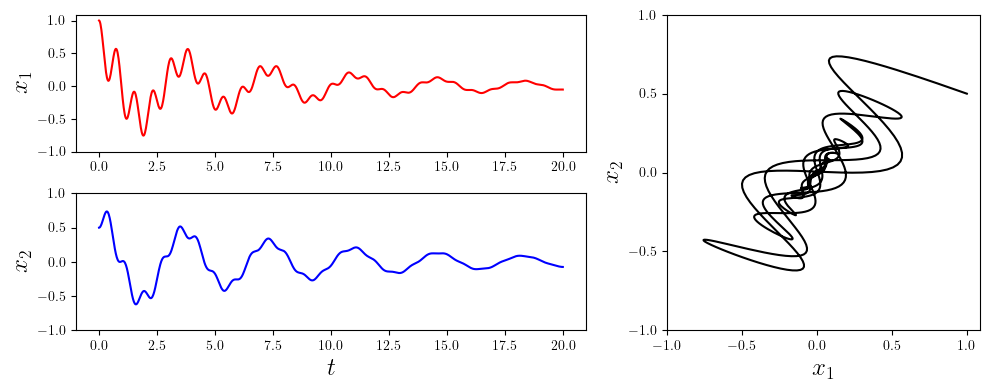

In [33]:
fig = plt.figure(figsize=(10, 4))
ax1 = plt.subplot2grid((2, 5), (0, 0), colspan=3)
ax2 = plt.subplot2grid((2, 5), (1, 0), colspan=3)
ax3 = plt.subplot2grid((2, 5), (0, 3), colspan=2, rowspan=2)

ax1.plot(t, y[:, 0], 'r')
ax1.set_ylabel('$x_1$', fontsize=18)
ax1.set_yticks([-1, -.5, 0, .5, 1])

ax2.plot(t, y[:, 2], 'b')
ax2.set_xlabel('$t$', fontsize=18)
ax2.set_ylabel('$x_2$', fontsize=18)
ax2.set_yticks([-1, -.5, 0, .5, 1])

ax3.plot(y[:, 0], y[:, 2], 'k')
ax3.set_xlabel('$x_1$', fontsize=18)
ax3.set_ylabel('$x_2$', fontsize=18)
ax3.set_xticks([-1, -.5, 0, .5, 1])
ax3.set_yticks([-1, -.5, 0, .5, 1])

fig.tight_layout()

### Mismos cálculos, pero usando previamente SymPy para definir el problema para SciPy

In [34]:
L1 = L2 = 0
t = sp.symbols("t")
m1, k1, b1 = sp.symbols("m_1, k_1, b_1")
m2, k2, b2 = sp.symbols("m_2, k_2, b_2")

In [35]:
x1 = sp.Function("x_1")
x2 = sp.Function("x_2")

In [36]:
ode1 = sp.Eq(m1 * x1(t).diff(t,t,) + b1 * x1(t).diff(t) + k1*(x1(t)-L1) - k2*(x2(t)-x1(t) - L2),0)

In [37]:
ode2 = sp.Eq(m2 * x2(t).diff(t,t,) + b2 * x2(t).diff(t) + k2*(x2(t)-x1(t)-L2),0)

In [38]:
params = {m1: 1.0, k1: 10.0, b1: 0.5,
          m2: 2.0, k2: 40.0, b2: 0.25}

In [39]:
args

(1.0, 10.0, 0.5, 2.0, 40.0, 0.25)

In [40]:
y1 = sp.Function("y_1")
y2 = sp.Function("y_2")
y3 = sp.Function("y_3")
y4 = sp.Function("y_4")

In [41]:
varchange = {x1(t).diff(t, t): y2(t).diff(t), 
             x1(t): y1(t),
             x2(t).diff(t, t): y4(t).diff(t), 
             x2(t): y3(t)}

In [42]:
(ode1.subs(varchange).lhs, ode2.subs(varchange).lhs)

(b_1*Derivative(y_1(t), t) + k_1*y_1(t) - k_2*(-y_1(t) + y_3(t)) + m_1*Derivative(y_2(t), t),
 b_2*Derivative(y_3(t), t) + k_2*(-y_1(t) + y_3(t)) + m_2*Derivative(y_4(t), t))

In [43]:
ode3 = y1(t).diff(t) - y2(t)

In [44]:
ode4 = y3(t).diff(t) - y4(t)

In [45]:
vcsol = sp.solve((ode1.subs(varchange), ode2.subs(varchange), ode3, ode4),
                    (y1(t).diff(t), y2(t).diff(t), y3(t).diff(t), y4(t).diff(t)))

In [46]:
vcsol

{Derivative(y_1(t), t): y_2(t),
 Derivative(y_2(t), t): -b_1*y_2(t)/m_1 - k_1*y_1(t)/m_1 - k_2*y_1(t)/m_1 + k_2*y_3(t)/m_1,
 Derivative(y_3(t), t): y_4(t),
 Derivative(y_4(t), t): -b_2*y_4(t)/m_2 + k_2*y_1(t)/m_2 - k_2*y_3(t)/m_2}

In [47]:
ode_rhs = sp.Matrix([y1(t).diff(t), y2(t).diff(t), y3(t).diff(t), y4(t).diff(t)]).subs(vcsol)

In [48]:
y = sp.Matrix([y1(t), y2(t), y3(t), y4(t)])

In [49]:
sp.Eq(y.diff(t), ode_rhs)

Eq(Matrix([
[Derivative(y_1(t), t)],
[Derivative(y_2(t), t)],
[Derivative(y_3(t), t)],
[Derivative(y_4(t), t)]]), Matrix([
[                                                            y_2(t)],
[-b_1*y_2(t)/m_1 - k_1*y_1(t)/m_1 - k_2*y_1(t)/m_1 + k_2*y_3(t)/m_1],
[                                                            y_4(t)],
[                 -b_2*y_4(t)/m_2 + k_2*y_1(t)/m_2 - k_2*y_3(t)/m_2]]))

In [50]:
f_np = sp.lambdify((t, y), ode_rhs.subs(params), 'numpy')

In [51]:
y0 = [1.0, 0, 0.5, 0]
t = np.linspace(0, 20, 1000)

r = integrate.ode(f_np)
r.set_integrator('lsoda');
r.set_initial_value(y0, t[0]);

dt = t[1] - t[0]
y = np.zeros((len(t), len(y0)))
idx = 0
while r.successful() and r.t < t[-1]:
    y[idx, :] = r.y
    r.integrate(r.t + dt)
    idx += 1

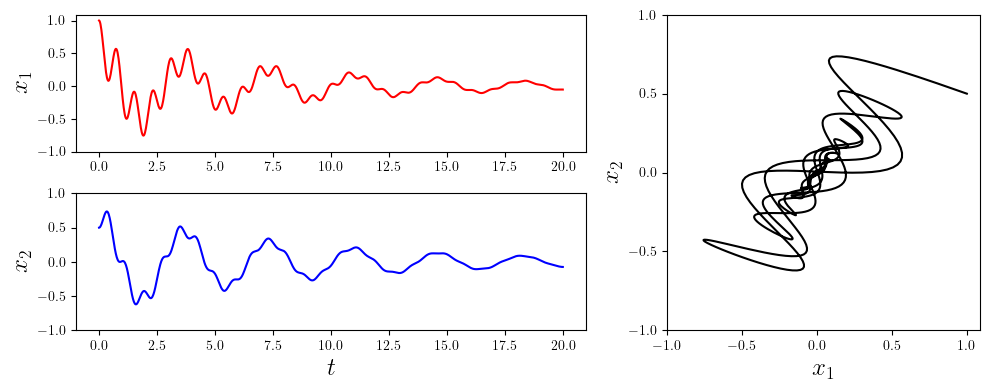

In [52]:
fig = plt.figure(figsize=(10, 4))
ax1 = plt.subplot2grid((2, 5), (0, 0), colspan=3)
ax2 = plt.subplot2grid((2, 5), (1, 0), colspan=3)
ax3 = plt.subplot2grid((2, 5), (0, 3), colspan=2, rowspan=2)

ax1.plot(t, y[:, 0], 'r')
ax1.set_ylabel('$x_1$', fontsize=18)
ax1.set_yticks([-1, -.5, 0, .5, 1])

ax2.plot(t, y[:, 2], 'b')
ax2.set_xlabel('$t$', fontsize=18)
ax2.set_ylabel('$x_2$', fontsize=18)
ax2.set_yticks([-1, -.5, 0, .5, 1])

ax3.plot(y[:, 0], y[:, 2], 'k')
ax3.set_xlabel('$x_1$', fontsize=18)
ax3.set_ylabel('$x_2$', fontsize=18)
ax3.set_xticks([-1, -.5, 0, .5, 1])
ax3.set_yticks([-1, -.5, 0, .5, 1])

fig.tight_layout()

## Doble péndulo

http://scienceworld.wolfram.com/physics/DoublePendulum.html

$$
(m_1+m_2) l_1\theta_1'' + m_2l_2\theta_2''\cos(\theta_1-\theta_2)
+ m_2l_2(\theta_2')^2\sin(\theta_1-\theta_2)+g(m_1+m_2)\sin(\theta_1) = 0
$$

$$
m_2l_2\theta_2'' + m_2l_1\theta_1''\cos(\theta_1-\theta_2) - m_2l_1 (\theta_1')^2 \sin(\theta_1-\theta_2)
+m_2g\sin(\theta_2) = 0
$$

In [53]:
t, g, m1, l1, m2, l2 = sp.symbols("t, g, m_1, l_1, m_2, l_2")

In [54]:
theta1, theta2 = sp.symbols("theta_1, theta_2", cls=sp.Function)

In [55]:
ode1 = sp.Eq((m1+m2)*l1 * theta1(t).diff(t,t) +
                m2*l2 * theta2(t).diff(t,t) +
                m2*l2 * theta2(t).diff(t)**2 * sp.sin(theta1(t)-theta2(t)) + 
                g*(m1+m2) * sp.sin(theta1(t)),0)
ode1

Eq(g*(m_1 + m_2)*sin(theta_1(t)) + l_1*(m_1 + m_2)*Derivative(theta_1(t), (t, 2)) + l_2*m_2*sin(theta_1(t) - theta_2(t))*Derivative(theta_2(t), t)**2 + l_2*m_2*Derivative(theta_2(t), (t, 2)), 0)

In [56]:
ode2 = sp.Eq(m2*l2 * theta2(t).diff(t,t) +
                m2*l1 * theta1(t).diff(t,t) * sp.cos(theta1(t)-theta2(t)) -
                m2*l1 * theta1(t).diff(t)**2 * sp.sin(theta1(t) - theta2(t)) +
                m2*g * sp.sin(theta2(t)),0)
ode2

Eq(g*m_2*sin(theta_2(t)) - l_1*m_2*sin(theta_1(t) - theta_2(t))*Derivative(theta_1(t), t)**2 + l_1*m_2*cos(theta_1(t) - theta_2(t))*Derivative(theta_1(t), (t, 2)) + l_2*m_2*Derivative(theta_2(t), (t, 2)), 0)

In [57]:
# Esto resultará infructuoso, ya que Sympy no puede resolver simbólicamente estas EDOs
try:
    sp.dsolve(ode1, ode2)
except Exception as e:
    print(e)

cannot determine truth value of Relational


In [58]:
y1, y2, y3, y4 = sp.symbols("y_1, y_2, y_3, y_4", cls=sp.Function)

In [59]:
varchange = {theta1(t).diff(t, t): y2(t).diff(t), 
             theta1(t): y1(t),
             theta2(t).diff(t, t): y4(t).diff(t), 
             theta2(t): y3(t)}

In [60]:
ode1_vc = ode1.subs(varchange)

In [61]:
ode2_vc = ode2.subs(varchange)

In [62]:
ode3 = y1(t).diff(t) - y2(t)

In [63]:
ode4 = y3(t).diff(t) - y4(t)

In [64]:
y = sp.Matrix([y1(t), y2(t), y3(t), y4(t)])

In [65]:
vcsol = sp.solve((ode1_vc, ode2_vc, ode3, ode4), y.diff(t), dict=True)

In [66]:
f = y.diff(t).subs(vcsol[0])

In [67]:
sp.Eq(y.diff(t), f)

Eq(Matrix([
[Derivative(y_1(t), t)],
[Derivative(y_2(t), t)],
[Derivative(y_3(t), t)],
[Derivative(y_4(t), t)]]), Matrix([
[                                                                                                                                                                                                                                                                                 y_2(t)],
[                                                                                            (-g*m_1*sin(y_1(t)) - g*m_2*sin(y_1(t)) + g*m_2*sin(y_3(t)) - l_1*m_2*y_2(t)**2*sin(y_1(t) - y_3(t)) - l_2*m_2*y_4(t)**2*sin(y_1(t) - y_3(t)))/(l_1*(m_1 - m_2*cos(y_1(t) - y_3(t)) + m_2))],
[                                                                                                                                                                                                                                                                                 y_4(t)],
[(g*m_1*sin(2*y_1(t) - y_3(t

In [68]:
params = {m1: 5.0, l1: 2.0,
          m2: 1.0, l2: 1.0, g: 10.0}

In [69]:
f_np = sp.lambdify((t, y), f.subs(params), 'numpy')

In [70]:
jac = sp.Matrix([[fj.diff(yi) for yi in y] for fj in f])

In [71]:
jac_np = sp.lambdify((t, y), jac.subs(params), 'numpy')

In [72]:
y0 = [2.0, 0, 0.0, 0]

In [73]:
t = np.linspace(0, 20, 1000)

In [74]:
jac_np(0, y0)

array([[ 0.        ,  1.        ,  0.        ,  0.        ],
       [ 2.54831741, -0.        ,  0.1767457 , -0.        ],
       [ 0.        ,  0.        ,  0.        ,  1.        ],
       [-5.61099875,  0.        , -2.12094846, -0.        ]])

In [75]:
r = integrate.ode(f_np, jac_np).set_initial_value(y0, t[0]);
 
dt = t[1] - t[0]
y = np.zeros((len(t), len(y0)))
idx = 0
while r.successful() and r.t < t[-1]:
    y[idx, :] = r.y
    r.integrate(r.t + dt)
    idx += 1

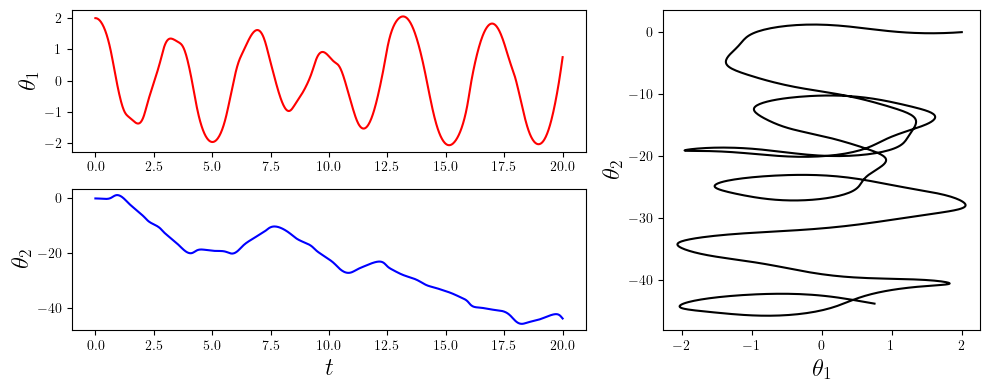

In [76]:
fig = plt.figure(figsize=(10, 4))
ax1 = plt.subplot2grid((2, 5), (0, 0), colspan=3)
ax2 = plt.subplot2grid((2, 5), (1, 0), colspan=3)
ax3 = plt.subplot2grid((2, 5), (0, 3), colspan=2, rowspan=2)

ax1.plot(t, y[:, 0], 'r')
ax1.set_ylabel(r'$\theta_1$', fontsize=18)

ax2.plot(t, y[:, 2], 'b')
ax2.set_xlabel('$t$', fontsize=18)
ax2.set_ylabel(r'$\theta_2$', fontsize=18)

ax3.plot(y[:, 0], y[:, 2], 'k')
ax3.set_xlabel(r'$\theta_1$', fontsize=18)
ax3.set_ylabel(r'$\theta_2$', fontsize=18)

fig.tight_layout()

In [77]:
theta1_np, theta2_np = y[:, 0], y[:, 2]

In [78]:
x1 = params[l1] * np.sin(theta1_np)
y1 = -params[l1] * np.cos(theta1_np)
x2 = x1 + params[l2] * np.sin(theta2_np)
y2 = y1 - params[l2] * np.cos(theta2_np)

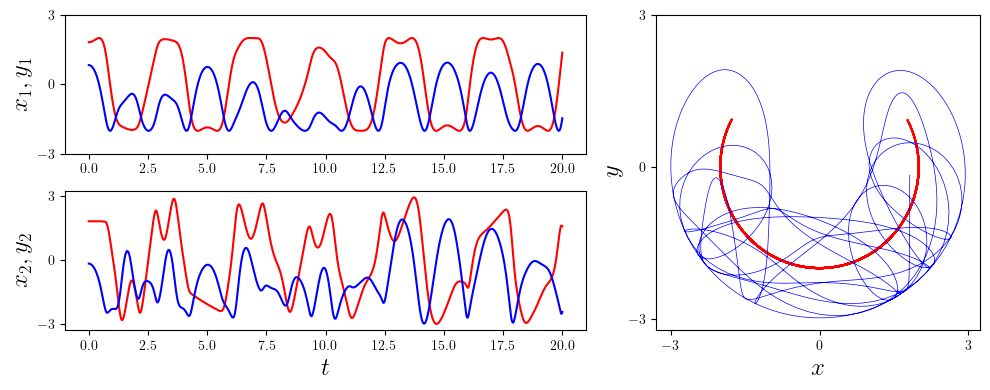

In [79]:
fig = plt.figure(figsize=(10, 4))
ax1 = plt.subplot2grid((2, 5), (0, 0), colspan=3)
ax2 = plt.subplot2grid((2, 5), (1, 0), colspan=3)
ax3 = plt.subplot2grid((2, 5), (0, 3), colspan=2, rowspan=2)

ax1.plot(t, x1, 'r')
ax1.plot(t, y1, 'b')
ax1.set_ylabel('$x_1, y_1$', fontsize=18)
ax1.set_yticks([-3, 0, 3])

ax2.plot(t, x2, 'r')
ax2.plot(t, y2, 'b')
ax2.set_xlabel('$t$', fontsize=18)
ax2.set_ylabel('$x_2, y_2$', fontsize=18)
ax2.set_yticks([-3, 0, 3])

ax3.plot(x1, y1, 'r')
ax3.plot(x2, y2, 'b', lw=0.5)
ax3.set_xlabel('$x$', fontsize=18)
ax3.set_ylabel('$y$', fontsize=18)
ax3.set_xticks([-3, 0, 3])
ax3.set_yticks([-3, 0, 3])

fig.tight_layout()
# fig.savefig('ch9-double-pendulum.pdf')